In [1]:
import ROOT

Welcome to JupyROOT 6.24/07


In [2]:
ROOT.gSystem.Load('./RooMvn2d_cxx.so')

0


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
import matplotlib.pyplot as plt
import numpy as np

import time

In [4]:
true_mean_x = 0.2
true_mean_y = 0.8
true_sigma_x = 1.0
true_sigma_y = 1.5
true_rho_xy = -0.6
true_sigma2_x = true_sigma_x * true_sigma_x
true_sigma2_y = true_sigma_y * true_sigma_y
true_cov_xy = true_rho_xy * true_sigma_x * true_sigma_y

true_cov = np.array( [[true_sigma2_x, true_cov_xy], [true_cov_xy, true_sigma2_y]] )
true_mu = np.array( [true_mean_x, true_mean_y])



In [5]:
ngen = 10000

true_pts = np.random.multivariate_normal(true_mu, true_cov, size=ngen)

In [6]:

eff = 1.-1./(1.+np.exp(-1*true_pts[:,0]))

rndm = np.random.rand(len(true_pts))
weight = 1./eff

In [7]:
selected_pts = true_pts[ rndm < eff ]
selected_weights = weight[ rndm < eff]

In [8]:
selected_pts.shape

(4509, 2)

In [9]:
selected_weights.shape

(4509,)

<function matplotlib.pyplot.show(close=None, block=None)>

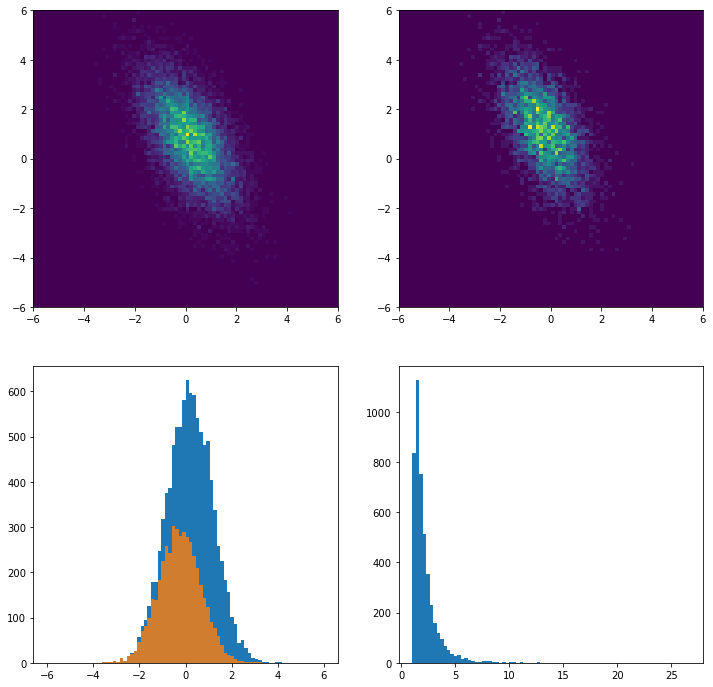

In [10]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hbins = 80
hmin = -6
hmax = 6

ax[0][0].hist2d( true_pts[:,0], true_pts[:,1], bins=(hbins,hbins), range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( selected_pts[:,0], selected_pts[:,1], bins=(hbins,hbins), range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax])
ax[1][0].hist( selected_pts[:,0], bins=hbins, range=[hmin,hmax], alpha=0.8)

ax[1][1].hist( selected_weights[:], bins=hbins)

plt.show

In [11]:
x = ROOT.RooRealVar("x","x",-10.,10.)
y = ROOT.RooRealVar("y","y",-10.,10.)
mean_x = ROOT.RooRealVar("mean_x","mean_x", true_mean_x, -3., 3.)
mean_y = ROOT.RooRealVar("mean_y","mean_y", true_mean_y, -3., 3.)
sigma2_x = ROOT.RooRealVar("sigma2_x","sigma2_x", true_sigma2_x, 0.1, 9. )
sigma2_y = ROOT.RooRealVar("sigma2_y","sigma2_y", true_sigma2_y, 0.1, 9. )
cov_xy = ROOT.RooRealVar("cov_xy","cov_xy", true_cov_xy, -9., 9.)

weight = ROOT.RooRealVar("weight","weight", 0., 100. )

In [12]:
rmvn = ROOT.RooMvn2d( "rmvn", "rmvn", x, y, mean_x, mean_y, sigma2_x, sigma2_y, cov_xy )

In [13]:
data_weighted = ROOT.RooDataSet("data_weighted","data_weighted", ROOT.RooArgSet(x,y,weight), ROOT.RooFit.WeightVar("weight"))

In [14]:
for i in range( len(selected_pts) ) :
    x.setVal(selected_pts[i,0])
    y.setVal(selected_pts[i,1])
    weight.setVal(selected_weights[i])
    data_weighted.add( ROOT.RooArgSet(x,y,weight), weight.getVal())

In [15]:
%%time

rfr = rmvn.fitTo( data_weighted, ROOT.RooFit.SumW2Error(False), ROOT.RooFit.Save(True))

CPU times: user 650 ms, sys: 17.6 ms, total: 667 ms
Wall time: 661 ms
[#1] INFO:NumericIntegration -- RooRealIntegral::init(rmvn_Int[x,y]) using numeric integrator RooAdaptiveIntegratorND to calculate Int(x,y)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 cov_xy      -9.00000e-01  1.80000e+00   -9.00000e+00  9.00000e+00
     2 mean_x       2.00000e-01  6.00000e-01   -3.00000e+00  3.00000e+00
     3 mean_y       8.00000e-01  6.00000e-01   -3.00000e+00  3.00000e+00
     4 sigma2_x     1.00000e+00  4.50000e-01    1.00000e-01  9.00000e+00
     5 sigma2_y     2.25000e+00  8.90000e-01    1.00000e-01  9.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 ***

In [16]:
print('')
print(' true mean_x = %.2f' % true_mean_x )
print(' true mean_y = %.2f' % true_mean_y )
print(' true sigma2_x = %.2f' % true_sigma2_x )
print(' true sigma2_y = %.2f' % true_sigma2_y )
print(' true cov_xy = %.3f' % true_cov_xy )
print('')
mean_x.Print()
mean_y.Print()
sigma2_x.Print()
sigma2_y.Print()
cov_xy.Print()


 true mean_x = 0.20
 true mean_y = 0.80
 true sigma2_x = 1.00
 true sigma2_y = 2.25
 true cov_xy = -0.900

RooRealVar::mean_x = 0.20318 +/- 0.0101921  L(-3 - 3) 
RooRealVar::mean_y = 0.784571 +/- 0.0151522  L(-3 - 3) 
RooRealVar::sigma2_x = 1.02111 +/- 0.0145575  L(0.1 - 9) 
RooRealVar::sigma2_y = 2.25679 +/- 0.0321743  L(0.1 - 9) 
RooRealVar::cov_xy = -0.890916 +/- 0.0177396  L(-9 - 9) 


In [17]:
%%time

rfr = rmvn.fitTo( data_weighted, ROOT.RooFit.SumW2Error(True), ROOT.RooFit.Save(True))

CPU times: user 536 ms, sys: 9.27 ms, total: 545 ms
Wall time: 540 ms
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 cov_xy      -8.90916e-01  1.77396e-02   -9.00000e+00  9.00000e+00
     2 mean_x       2.03180e-01  1.01921e-02   -3.00000e+00  3.00000e+00
     3 mean_y       7.84571e-01  1.51522e-02   -3.00000e+00  3.00000e+00
     4 sigma2_x     1.02111e+00  1.45575e-02    1.00000e-01  9.00000e+00
     5 sigma2_y     2.25679e+00  3.21743e-02    1.00000e-01  9.00000e+00
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   15 **MIGRAD        2500           1
 **********
 

In [18]:
print('')
print(' true mean_x = %.2f' % true_mean_x )
print(' true mean_y = %.2f' % true_mean_y )
print(' true sigma2_x = %.2f' % true_sigma2_x )
print(' true sigma2_y = %.2f' % true_sigma2_y )
print(' true cov_xy = %.3f' % true_cov_xy )
print('')
mean_x.Print()
mean_y.Print()
sigma2_x.Print()
sigma2_y.Print()
cov_xy.Print()


 true mean_x = 0.20
 true mean_y = 0.80
 true sigma2_x = 1.00
 true sigma2_y = 2.25
 true cov_xy = -0.900

RooRealVar::mean_x = 0.203181 +/- 0.0179895  L(-3 - 3) 
RooRealVar::mean_y = 0.784562 +/- 0.026608  L(-3 - 3) 
RooRealVar::sigma2_x = 1.02111 +/- 0.0373873  L(0.1 - 9) 
RooRealVar::sigma2_y = 2.25677 +/- 0.0691599  L(0.1 - 9) 
RooRealVar::cov_xy = -0.890926 +/- 0.0436666  L(-9 - 9) 


In [19]:
%%time

rfr = rmvn.fitTo( data_weighted, ROOT.RooFit.AsymptoticError(True), ROOT.RooFit.Save(True))

CPU times: user 5min 19s, sys: 2 s, total: 5min 21s
Wall time: 5min 17s
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **   22 **SET PRINT           1
 **********
 **********
 **   23 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 cov_xy      -8.90926e-01  4.36666e-02   -9.00000e+00  9.00000e+00
     2 mean_x       2.03181e-01  1.79895e-02   -3.00000e+00  3.00000e+00
     3 mean_y       7.84562e-01  2.66080e-02   -3.00000e+00  3.00000e+00
     4 sigma2_x     1.02111e+00  3.73873e-02    1.00000e-01  9.00000e+00
     5 sigma2_y     2.25677e+00  6.91599e-02    1.00000e-01  9.00000e+00
 **********
 **   24 **SET ERR         0.5
 **********
 **********
 **   25 **SET PRINT           1
 **********
 **********
 **   26 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   27 **MIGRAD        2500           1
 **********

In [20]:
print('')
print(' true mean_x = %.2f' % true_mean_x )
print(' true mean_y = %.2f' % true_mean_y )
print(' true sigma2_x = %.2f' % true_sigma2_x )
print(' true sigma2_y = %.2f' % true_sigma2_y )
print(' true cov_xy = %.3f' % true_cov_xy )
print('')
mean_x.Print()
mean_y.Print()
sigma2_x.Print()
sigma2_y.Print()
cov_xy.Print()


 true mean_x = 0.20
 true mean_y = 0.80
 true sigma2_x = 1.00
 true sigma2_y = 2.25
 true cov_xy = -0.900

RooRealVar::mean_x = 0.203184 +/- 0.023663  L(-3 - 3) 
RooRealVar::mean_y = 0.784558 +/- 0.0299614  L(-3 - 3) 
RooRealVar::sigma2_x = 1.02111 +/- 0.0428682  L(0.1 - 9) 
RooRealVar::sigma2_y = 2.25677 +/- 0.0719032  L(0.1 - 9) 
RooRealVar::cov_xy = -0.890925 +/- 0.047979  L(-9 - 9) 


[#1] INFO:InputArguments -- RooAbsData::plotOn(data_weighted) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Plotting -- RooAbsReal::plotOn(rmvn) plot on x integrates over variables (y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(rmvn_Int[y]_Norm[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:InputArguments -- RooAbsData::plotOn(data_weighted) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Plotting -- RooAbsReal::plotOn(rmvn) plot on y integrates over variables (x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(rmvn_Int[x]_Norm[x,y]) using numeric integrator RooIntegrator1D to calculate Int(x)


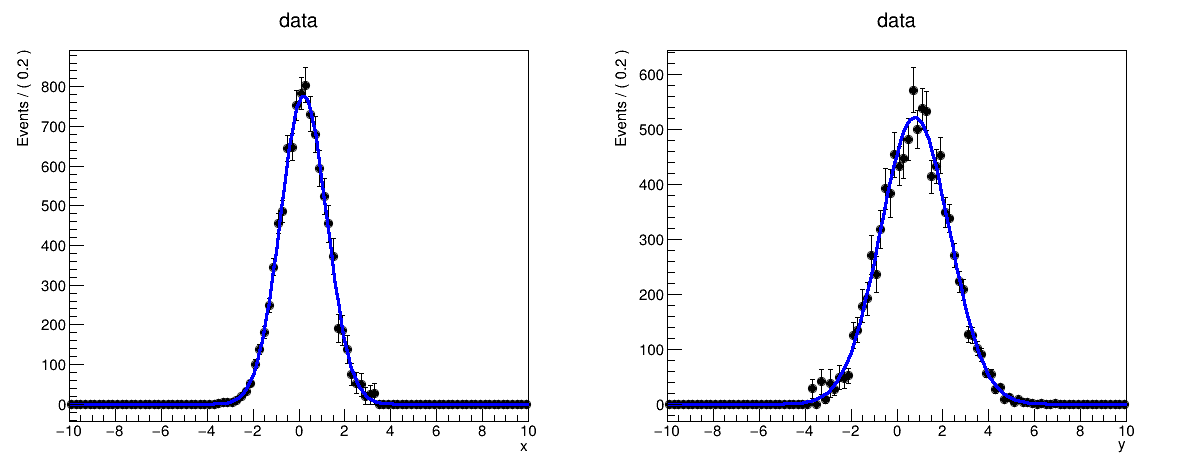

In [21]:
can = ROOT.TCanvas("can","can", 1200, 500)
can.Divide(2,1)

can.cd(1)
xframe = x.frame(ROOT.RooFit.Title("data"))
data_weighted.plotOn(xframe)
rmvn.plotOn(xframe)
xframe.Draw()
can.Draw()

can.cd(2)
yframe = y.frame(ROOT.RooFit.Title("data"))
data_weighted.plotOn(yframe)
rmvn.plotOn(yframe)
yframe.Draw()
can.Draw()
